# Project6
### Xichen Li, EE521 - Group 5

#### A) Xichen Li: I worked on project-6 all independently.


#### (1) Modify equation 9-15 to $U(r,t)=u(r)cos(k.r-\omega t-\beta)$. Re-derive equation (9-50) with the above U(r,t). Then discuss in detail the range on the Bloch sphere that can be traversed using pulses of various width. Assuming that the initial state is |0>. 

We start from $U(r,t)=u(r)cos(k.r-\omega t-\beta)$, then the two differential equation related to $a_1(t)$ and $a_2(t)$ can be written as:
$$i\hbar\frac{\partial a_1(t)}{\partial t} = [e^{i(\omega_{12}-\omega)t-i\beta}u_{12}+e^{i(\omega_{12}+\omega)t+i\beta}u_{12}]a_2(t)$$
$$i\hbar\frac{\partial a_2(t)}{\partial t} = [e^{i(\omega_{21}-\omega)t-i\beta}u_{21}+e^{i(\omega_{21}+\omega)t+i\beta}u_{21}]a_1(t)$$
Similarly, the average value of the second term with higher frequency $\omega_{12}+\omega$ or $\omega_{21}+\omega$ is approximately zero in a time scale of our interest. Thus, the two equations above can be written as:

$$i\hbar\frac{\partial a_1(t)}{\partial t} = [e^{i\Delta t-i\beta}u_{12}]a_2(t)$$
$$i\hbar\frac{\partial a_2(t)}{\partial t} = [e^{-i\Delta t-i\beta}u_{21}]a_1(t)$$
Where $\Delta = \omega - \omega_{21}$. By taking the first equation into the second one, we can get:
$$\frac{\partial^2 a_2(t)}{\partial t^2} + i\Delta \frac{\partial a_2(t)}{\partial t} + e^{-2i\beta}\frac{|u_{12}|^2}{\hbar^2}a_2(t)=0$$
Assuming the solution to the equation above has a form of $a_2(t)=Ce^{iBt}$ and then the equation above can be re-organized as:
$$a_2(t)[B^2 + \Delta B - e^{-2i\beta}\frac{|u_{12}|^2}{\hbar^2}]=0$$

The roots of this equation are:
$$B=\frac{-\Delta\pm\sqrt{\Delta^2+4\frac{|u_{12}|^2}{\hbar^2}e^{-2i\beta}}}{2}$$. Similarly, if we express $\Omega=\frac{|u_{12}|}{\hbar}$, and then $B$ can be re-written as:
$$B=\frac{-\Delta\pm\sqrt{\Delta^2+4\Omega^2e^{-2i\beta}}}{2}$$
Next, if defining $\Omega_1^{'}=\sqrt{\frac{\Delta^2}{4}+\Omega^2e^{-2i\beta}}$, we can finally derive a similar equation as 9-50 as below,

$$\psi=a_1(t)e^{-\frac{iE_{10}t}{\hbar}}\phi_{10} +a_2(t)e^{-\frac{iE_{20}t}{\hbar}}\phi_{20}$$
where
$$a_1(t)=-\frac{e^{\frac{i\Delta t}{2}}}{2\Omega_1^{'}}[(\frac{\Delta}{2}-\Omega_1^{'})e^{i\Omega_1^{'}t} - (\frac{\Delta}{2}+\Omega_1^{'})e^{-i\Omega_1^{'}t} ]$$
$$a_2(t)=-\Omega\frac{1}{2\Omega_1^{'}}e^{-\frac{i\Delta t}{2}}[e^{i\Omega_1^{'}t}-e^{-i\Omega_1^{'}t}]$$
$$\Omega_1^{'}=\sqrt{\frac{\Delta^2}{4}+\Omega^2e^{-2i\beta}}$$
$$\Omega = \frac{|u_{21}|}{\hbar}$$
$$\Delta = \omega - \omega _{21}$$


The corresponding probability $P_1(t)$ and $P_2(t)$ are:
$$P_1(t)=|a_1(t)|^2$$
$$P_2(t)=|a_2(t)|^2$$

Next, I am going to use the newly derived 9-50 to discuss the range on the Bloch sphere that can be trasversed.<br>
In the Bloch sphere, a quibit state can be expressed as:
$$\psi = cos(\frac{\theta}{2}) |0> + e^{i\phi}sin(\frac{\theta}{2}) |1> \label{eq-bloch}$$
The phase factor $\phi$ in the equation above doesn't change the probablity of |0> and |1> and thus it will be negelected in the following analysis. 

#### Again the analysis will assume two difference cases: 1) the detuning is zero and the ac driving frequency is equal to the natural or resonant frequency. 2) the detuning is not zero and the ac driving frequency is different from the natural or resonant frequency.

##### 1) Detuning is zero ($\Delta=0$):
$$P_1(t)=|-\frac{1}{2\Omega_1^{'}}[-\Omega_1^{'}e^{i\Omega_1^{'}t} - \Omega_1^{'}e^{-i\Omega_1^{'}t}|^2$$
$$P_2(t)=|-\Omega\frac{1}{2\Omega_1^{'}}[e^{i\Omega_1^{'}t}-e^{-i\Omega_1^{'}t}]|^2$$
To better understand the varaiation of $P_1(t)$ and $P_2(t)$ with time, I will use the code below. Here I assume $\Delta=0, \Omega=2\pi*5e6$ and vary $\beta$ to see its impact: 


(70248147.31040727+0j)


<IPython.core.display.Javascript object>


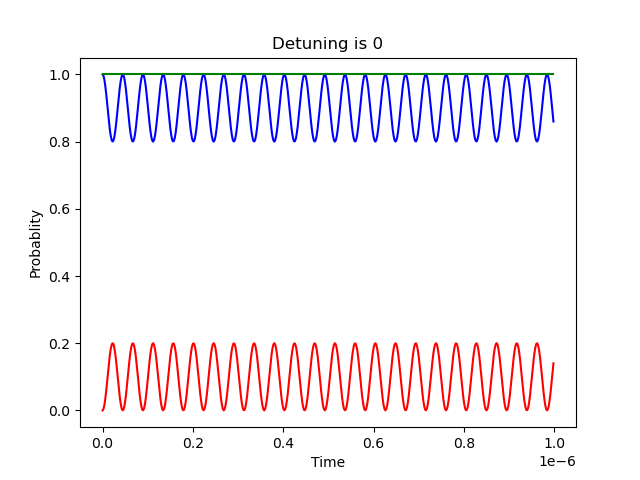

Text(0, 0.5, 'Probablity')

In [37]:
import numpy as np
#import numpy.pi as pi
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.integrate as spi

#eta = 6.63e-34/2/np.pi #Reduced Plank constant in eV.s
#q = 1.6e-19
#u21=6.5e-6*1e-3*q
#w21=2*q/eta
#w=2.05*q/eta
#omega=abs(u21)/eta
delta=2*np.pi*20e6
omega=2*np.pi*5e6
beta=np.pi*0
omega1p=np.sqrt(omega**2*np.exp(-1j*2*beta)+delta**2/4)

print(omega1p)

Tend=1e-6
dt=2e-9
t = np.arange(0,Tend,dt)
P2=(abs(-omega/(2*omega1p)*np.exp(-1j*delta*t/2)*(np.exp(1j*omega1p*t)-np.exp(-1j*omega1p*t))))**2
P1=(abs(np.exp(1j*delta*t/2)/(2*omega1p)*((delta/2-omega1p)*np.exp(1j*omega1p*t)-(delta/2+omega1p)*np.exp(-1j*omega1p*t))))**2

##(np.exp(1j*omega1p*t)-np.exp(-1j*omega1p*t))

plt.figure()
plt.plot(t, P1, color='b', ls='-')
plt.plot(t, P2, color='r', ls='-')
plt.plot(t, P1+P2, color='g', ls='-')
#plt.legend(['P1(t)', 'P2(t)','P1(t)+P2(t)'])
plt.title('Detuning is 0')
plt.xlabel('Time')
plt.ylabel('Probablity')

##### 2) Detuning is not zero ($\Delta\neq0$):
$$P_1(t)=|a_1(t)|^2=|cos(\Omega_1^{'}t)-\frac{i\Delta}{2\Omega_1^{'}}sin(\Omega_1^{'}t)|^2$$
$$P_2(t)=|a_2(t)|^2=|\frac{\Omega}{\Omega_1^{'}}sin(\Omega_1^{'}t)|^2$$

0.6923076923076922
9013878.188659973
67.3801350519596


<IPython.core.display.Javascript object>


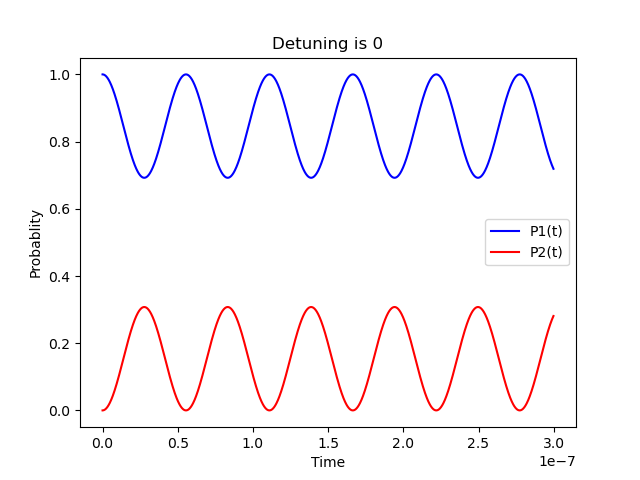

Text(0, 0.5, 'Probablity')

In [38]:
delta=2*np.pi*15e6
omega=2*np.pi*5e6
omegap=np.sqrt(omega**2+delta**2/4)

Tend=1e-6
dt=10e-9
t = np.arange(0,Tend,dt)
P1=(np.cos(omegap*t))**2 + delta**2/4/omegap**2*(np.sin(omegap*t))**2
P2=omega**2/omegap**2*(np.sin(omegap*t))**2

print(delta**2/4/omegap**2)
print(omegap/np.pi/2)
print(2*np.arccos(delta/2/omegap)/np.pi*180)

Tend=3e-7
dt=2e-10
t = np.arange(0,Tend,dt)
P1=(np.cos(omegap*t))**2 + delta**2/4/omegap**2*(np.sin(omegap*t))**2
P2=omega**2/omegap**2*(np.sin(omegap*t))**2

plt.figure()
plt.plot(t, P1, color='b', ls='-')
plt.plot(t, P2, color='r', ls='-')
#plt.plot(t, P1+P2, color='g', ls='-')
plt.legend(['P1(t)', 'P2(t)','P1(t)+P2(t)'])
plt.title('Detuning is 0')
plt.xlabel('Time')
plt.ylabel('Probablity')

#### (2) Draw the points reached on the Bloch sphere if the initial state is |0>. 

##### 1) Detuning is zero ($\Delta=0$):
The points on the bloch Sphere is shown below and the phase factor is neglected. 

<IPython.core.display.Javascript object>


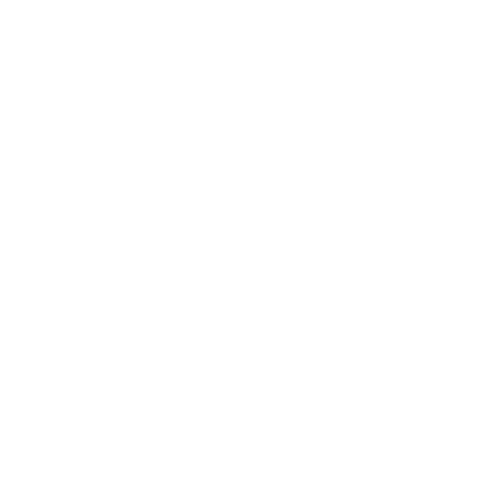

<IPython.core.display.Javascript object>


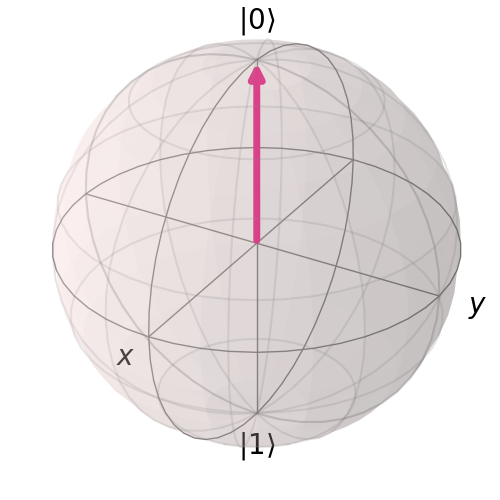

In [39]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, 0, np.pi/3], coord_type='spherical')


The figure above is the initial state $|0>$.

<IPython.core.display.Javascript object>


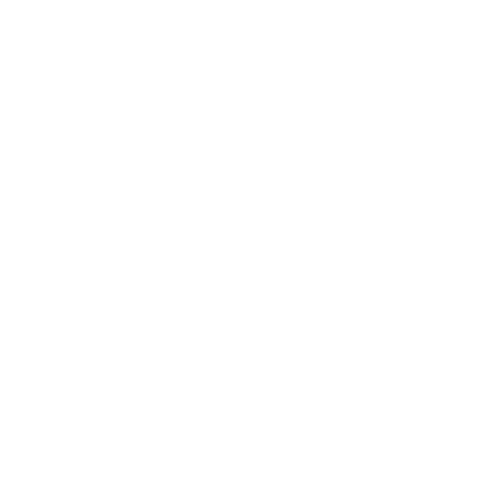

<IPython.core.display.Javascript object>


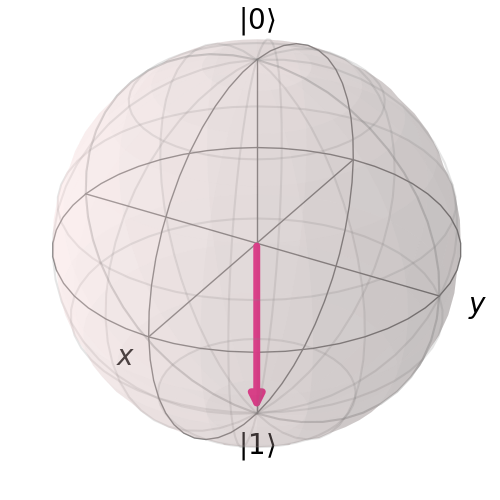

In [40]:
delta=0 #Detuning
omega=2*np.pi*5e6
omegap=np.sqrt(omega**2+delta**2/4)
phi=(2*np.arccos(delta/2/omegap))
#print(phi)
plot_bloch_vector([1, phi, 0], coord_type='spherical')


##### 1) Detuning is zero ($\Delta=0$):
The points on the bloch Sphere is shown below and the phase factor is neglected. The initial state is still $|0>$ which is already plotted.

<IPython.core.display.Javascript object>


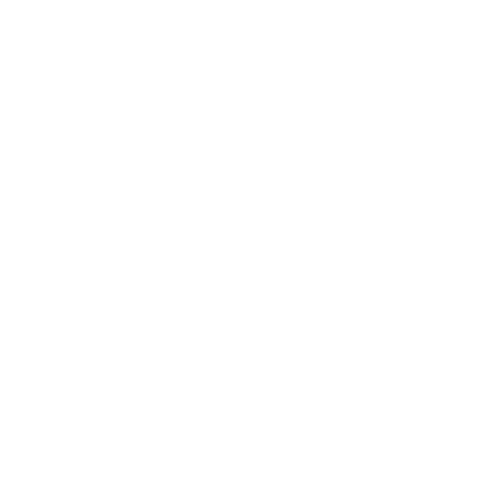

<IPython.core.display.Javascript object>


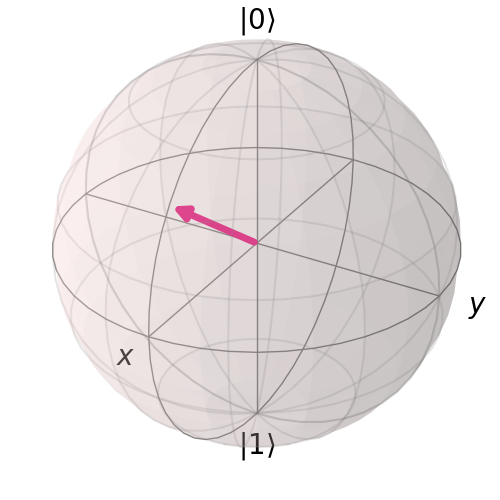

In [41]:
delta=2*np.pi*20e6 
omega=2*np.pi*5e6
omegap=np.sqrt(omega**2+delta**2/4)
phi=(2*np.arccos(delta/2/omegap))
#print(phi)
plot_bloch_vector([1, phi, 0], coord_type='spherical')